**INSTALL LIBRARY**

In [1]:
!pip install sastrawi
!pip install googletrans==3.1.0a0
!pip install --upgrade pip
!pip install gensim
!pip install --upgrade keras
!pip install --upgrade tensorflow
!pip install tensorflow
import pandas as pd
import numpy as np
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import joblib
import tensorflow as tf
import googletrans
import textblob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from googletrans import Translator
from textblob import TextBlob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ASUS K413\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to C:\Users\ASUS
[nltk_data]     K413\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ASUS
[nltk_data]     K413\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PREPROCESSING**

In [ ]:
#IMPORT DATASET
df = pd.read_csv('databersih.csv', sep=',', encoding='latin1')

#PREPROCESSING
def filteringText(ulasan):
    ulasan = re.sub(r'@[A-Za-z0-9]+', '', ulasan)
    ulasan = re.sub(r'#[A-Za-z0-9]+', '', ulasan)
    ulasan = re.sub(r'RT[\s]', '', ulasan)
    ulasan = re.sub(r"http\S+", '', ulasan)
    ulasan = re.sub(r'[0-9]+', '', ulasan)
    ulasan = re.sub(r'(.)\1+',r'\1\1', ulasan)
    ulasan = re.sub(r'[\?\.\!]+(?=[\?.\!])', '',ulasan)
    ulasan = re.sub(r'[^a-zA-Z]',' ', ulasan)
    ulasan = re.sub(r'\b(\w+)( \1\b)+', r'\1', ulasan)
    ulasan = ulasan.replace('\n', ' ')
    ulasan = ulasan.translate(str.maketrans('', '', string.punctuation))
    ulasan = ulasan.strip(' ')
    return ulasan

def casefoldingText(ulasan):
    ulasan = ulasan.lower()
    return ulasan

from nltk.tokenize import word_tokenize
def tokenizingText(ulasan):
    ulasan = word_tokenize(ulasan)
    return ulasan

data_slang = pd.read_csv('kamus_slangword.csv')
def replace_slang(ulasan):
    res = ''
    for item in ulasan.split():
        if item in data_slang.slang.values:
            res += data_slang[data_slang['slang'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res

from nltk.corpus import stopwords
def stopwords_removal(ulasan):
    filtering = stopwords.words('indonesian','english')
    x=[]
    data=[]
    def myFunc(x):

        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, ulasan)
    for x in fit:
        data.append(x)
    return data


def stemming(ulasan) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

In [ ]:
#Case Folding
df['preprocessing'] = df['ulasan'].apply(casefoldingText)
df.to_csv('casefoldingText.csv')
df[['ulasan', 'preprocessing']].head(10)

,ulasan,preprocessing
0,@mazzini_gsp Usut tuntas pak aparat jangan pan...,@mazzini_gsp usut tuntas pak aparat jangan pan...
1,Survei Indopol: Mayoritas Publik Puas dengan K...,survei indopol: mayoritas publik puas dengan k...
2,"@Bam16947005 @cruewiy @tanyarlfes Bisa, jadi a...","@bam16947005 @cruewiy @tanyarlfes bisa, jadi a..."
3,@sandiuno Salut beserta senang campur bahagia ...,@sandiuno salut beserta senang campur bahagia ...
4,Apa harus bgt ada bpkb pak @TMCPoldaMetro kalo...,apa harus bgt ada bpkb pak @tmcpoldametro kalo...
5,RAPAT KOORDINASI PEMBAHASAN PROGRAM KERJA TIM ...,rapat koordinasi pembahasan program kerja tim ...
6,@chjisuu aliapaca ni kerja sambilan sebagai po...,@chjisuu aliapaca ni kerja sambilan sebagai po...
7,@txtdrimedia Polisi cybernya kerja gak ya,@txtdrimedia polisi cybernya kerja gak ya
8,"@HailOfMary Lara aja hey! Ah ya juga, ditahan...","@hailofmary lara aja hey! ah ya juga, ditahan..."
9,"Menurut Joko, AJI menuntut agar polisi dan ins...","menurut joko, aji menuntut agar polisi dan ins..."


In [ ]:
#slangword
df['preprocessing'] = df['preprocessing'].apply(replace_slang)
df.to_csv('replace_slang.csv')
df[['ulasan', 'preprocessing']].head(10)

,ulasan,preprocessing
0,@mazzini_gsp Usut tuntas pak aparat jangan pan...,@mazzini_gsp usut tuntas pak aparat jangan pan...
1,Survei Indopol: Mayoritas Publik Puas dengan K...,survei indopol: mayoritas publik puas dengan k...
2,"@Bam16947005 @cruewiy @tanyarlfes Bisa, jadi a...","@bam16947005 @cruewiy @tanyarlfes bisa, jadi a..."
3,@sandiuno Salut beserta senang campur bahagia ...,@sandiuno salut beserta senang campur bahagia ...
4,Apa harus bgt ada bpkb pak @TMCPoldaMetro kalo...,apa harus banget ada bpkb pak @tmcpoldametro k...
5,RAPAT KOORDINASI PEMBAHASAN PROGRAM KERJA TIM ...,rapat koordinasi pembahasan program kerja tim ...
6,@chjisuu aliapaca ni kerja sambilan sebagai po...,@chjisuu aliapaca ini kerja sambilan sebagai p...
7,@txtdrimedia Polisi cybernya kerja gak ya,@txtdrimedia polisi cybernya kerja enggak iya
8,"@HailOfMary Lara aja hey! Ah ya juga, ditahan...","@hailofmary lara saja hey! ah iya juga, ditaha..."
9,"Menurut Joko, AJI menuntut agar polisi dan ins...","menurut joko, aji menuntut agar polisi dan ins..."


In [ ]:
#filtering
df['preprocessing'] = df['preprocessing'].apply(filteringText)
df.to_csv('filteringText.csv')
df[['ulasan', 'preprocessing']].head(10)

,ulasan,preprocessing
0,@mazzini_gsp Usut tuntas pak aparat jangan pan...,gsp usut tuntas pak aparat jangan pandang bulu
1,Survei Indopol: Mayoritas Publik Puas dengan K...,survei indopol mayoritas publik puas dengan k...
2,"@Bam16947005 @cruewiy @tanyarlfes Bisa, jadi a...",bisa jadi auditor semisal kuliah akuntansi ...
3,@sandiuno Salut beserta senang campur bahagia ...,salut beserta senang campur bahagia bila mliha...
4,Apa harus bgt ada bpkb pak @TMCPoldaMetro kalo...,apa harus banget ada bpkb pak kalau kehilanga...
5,RAPAT KOORDINASI PEMBAHASAN PROGRAM KERJA TIM ...,rapat koordinasi pembahasan program kerja tim ...
6,@chjisuu aliapaca ni kerja sambilan sebagai po...,aliapaca ini kerja sambilan sebagai polisi ya
7,@txtdrimedia Polisi cybernya kerja gak ya,polisi cybernya kerja enggak iya
8,"@HailOfMary Lara aja hey! Ah ya juga, ditahan...",lara saja hey ah iya juga ditahan polisi en...
9,"Menurut Joko, AJI menuntut agar polisi dan ins...",menurut joko aji menuntut agar polisi dan ins...


In [ ]:
#tokenisasi
df['preprocessing'] = df['preprocessing'].apply(tokenizingText)
df.to_csv('tokenizingText.csv')
df[['ulasan', 'preprocessing']].head(10)

,ulasan,preprocessing
0,@mazzini_gsp Usut tuntas pak aparat jangan pan...,"[gsp, usut, tuntas, pak, aparat, jangan, panda..."
1,Survei Indopol: Mayoritas Publik Puas dengan K...,"[survei, indopol, mayoritas, publik, puas, den..."
2,"@Bam16947005 @cruewiy @tanyarlfes Bisa, jadi a...","[bisa, jadi, auditor, semisal, kuliah, akuntan..."
3,@sandiuno Salut beserta senang campur bahagia ...,"[salut, beserta, senang, campur, bahagia, bila..."
4,Apa harus bgt ada bpkb pak @TMCPoldaMetro kalo...,"[apa, harus, banget, ada, bpkb, pak, kalau, ke..."
5,RAPAT KOORDINASI PEMBAHASAN PROGRAM KERJA TIM ...,"[rapat, koordinasi, pembahasan, program, kerja..."
6,@chjisuu aliapaca ni kerja sambilan sebagai po...,"[aliapaca, ini, kerja, sambilan, sebagai, poli..."
7,@txtdrimedia Polisi cybernya kerja gak ya,"[polisi, cybernya, kerja, enggak, iya]"
8,"@HailOfMary Lara aja hey! Ah ya juga, ditahan...","[lara, saja, hey, ah, iya, juga, ditahan, poli..."
9,"Menurut Joko, AJI menuntut agar polisi dan ins...","[menurut, joko, aji, menuntut, agar, polisi, d..."


In [ ]:
#stemmer
df['stemming_ulasan'] = df['preprocessing'].apply(stemming)
df.to_csv('stemming.csv')
df[['preprocessing', 'stemming_ulasan']].head(10)

gsp usut tuntas pak aparat jangan pandang bulu
survei indopol mayoritas publik puas dengan kerja polri lama
bisa jadi auditor misal kuliah akuntansi jadi investigator juga bisa kalau jadi polisi sama mungkin yang kerja di ppatk tuh butuh ilmu buat telusur harta aset orang alternatif jadi detektif swasta
salut serta senang campur bahagia bila mlihat kerja pak sandi yang selalu bantu masyarakat untuk hidup usaha lebih baik lagi o iya bisa anda bantu usaha rakyat di muba utama usaha suling minyak yang selalu jadi korban aparat sedang punya polisi aman saja
apa harus banget ada bpkb pak kalau hilang motor masalah nya ini sudah motor loh hilang begitu saja tapi enggak ada itu sama sekali polisi identifikasi atau ecek ke tkp tolong iya kapai saja iya kerja nya apa harus viral dulu kah baru kerja
rapat koordinasi bahas program kerja tim gerak lembur cepot
aliapaca ini kerja sambil bagai polisi ya
polisi cybernya kerja enggak iya
lara saja hey ah iya juga tahan polisi enggak jadi kerja besok j

,preprocessing,stemming_ulasan
0,"[gsp, usut, tuntas, pak, aparat, jangan, panda...",gsp usut tuntas pak aparat jangan pandang bulu
1,"[survei, indopol, mayoritas, publik, puas, den...",survei indopol mayoritas publik puas dengan ke...
2,"[bisa, jadi, auditor, semisal, kuliah, akuntan...",bisa jadi auditor misal kuliah akuntansi jadi ...
3,"[salut, beserta, senang, campur, bahagia, bila...",salut serta senang campur bahagia bila mlihat ...
4,"[apa, harus, banget, ada, bpkb, pak, kalau, ke...",apa harus banget ada bpkb pak kalau hilang mot...
5,"[rapat, koordinasi, pembahasan, program, kerja...",rapat koordinasi bahas program kerja tim gerak...
6,"[aliapaca, ini, kerja, sambilan, sebagai, poli...",aliapaca ini kerja sambil bagai polisi ya
7,"[polisi, cybernya, kerja, enggak, iya]",polisi cybernya kerja enggak iya
8,"[lara, saja, hey, ah, iya, juga, ditahan, poli...",lara saja hey ah iya juga tahan polisi enggak ...
9,"[menurut, joko, aji, menuntut, agar, polisi, d...",turut joko aji tuntut agar polisi dan institus...


**PELABELAN TEXTBLOB**

In [ ]:
#import dataset yang mau di translate
data = pd.read_csv('stemmingg.csv', sep=',', encoding='latin1')
data.head()

,text,clean_text,sentiment
0,@mazzini_gsp Usut tuntas pak aparat jangan pan...,gsp usut tuntas aparat pandang bulu,NaN
1,Survei Indopol: Mayoritas Publik Puas dengan K...,survei indopol mayoritas publik puas kerja polri,NaN
2,"@Bam16947005 @cruewiy @tanyarlfes Bisa, jadi a...",auditor kuliah akuntansi investigator polisi k...,NaN
3,@sandiuno Salut beserta senang campur bahagia ...,salut serta senang campur bahagia mlihat kerja...,NaN
4,Apa harus bgt ada bpkb pak @TMCPoldaMetro kalo...,banget bpkb hilang motor nya motor loh hilang ...,NaN


In [ ]:
#proses translate
df = pd.DataFrame(data.clean_text)
translator = Translator()
translations = {}
for column in df.columns:
  #unique elements dari kolom
  unique_elements = df[column].unique()
  for element in unique_elements:
    #memasukkan terjemahan ke kamus
    translations[element] = translator.translate(element).text

#masukin hasil translate ke kolom baru
data['translated_text'] = df.replace(translations)
data['translated_text'] = data['translated_text'].str.replace('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ')
data['translated_text'] = data['translated_text'].str.lower()

data.head()

,text,clean_text,sentiment,translated_text
0,@mazzini_gsp Usut tuntas pak aparat jangan pan...,gsp usut tuntas aparat pandang bulu,NaN,gsp thoroughly investigates the blinding appar...
1,Survei Indopol: Mayoritas Publik Puas dengan K...,survei indopol mayoritas publik puas kerja polri,NaN,"in the indopol survey, the majority of the pub..."
2,"@Bam16947005 @cruewiy @tanyarlfes Bisa, jadi a...",auditor kuliah akuntansi investigator polisi k...,NaN,"auditor studying accounting, police investigat..."
3,@sandiuno Salut beserta senang campur bahagia ...,salut serta senang campur bahagia mlihat kerja...,NaN,salute and happy mixed with happiness to see s...
4,Apa harus bgt ada bpkb pak @TMCPoldaMetro kalo...,banget bpkb hilang motor nya motor loh hilang ...,NaN,"really, sir, the motorbike is missing, the mot..."


In [ ]:
#import dataset hasil translate yang mau dilabelin
data.to_csv('hasil_translate.csv', encoding='utf8', index=False)

In [ ]:
#pemberian nilai subjektivitas dan polaritas untuk melabeli
def subjektivitas(tr_text):
  return TextBlob(tr_text).sentiment.subjectivity

def polaritas(tr_text):
  return TextBlob(tr_text).sentiment.polarity

def hasilSentimen(nilai):
  if nilai < 0:
    return 'negatif'
  elif nilai == 0:
    return 'netral'
  else:
    return 'positif'

data['subjektivitas'] = data['translated_text'].apply(subjektivitas)
data['polaritas'] = data['translated_text'].apply(polaritas)
data['sentimen'] = data['polaritas'].apply(hasilSentimen)

data.head()

,text,clean_text,sentiment,translated_text,subjektivitas,polaritas,sentimen
0,@mazzini_gsp Usut tuntas pak aparat jangan pan...,gsp usut tuntas aparat pandang bulu,NaN,gsp thoroughly investigates the blinding appar...,0.000000,0.000000,netral
1,Survei Indopol: Mayoritas Publik Puas dengan K...,survei indopol mayoritas publik puas kerja polri,NaN,"in the indopol survey, the majority of the pub...",0.533333,0.250000,positif
2,"@Bam16947005 @cruewiy @tanyarlfes Bisa, jadi a...",auditor kuliah akuntansi investigator polisi k...,NaN,"auditor studying accounting, police investigat...",0.375000,0.000000,netral
3,@sandiuno Salut beserta senang campur bahagia ...,salut serta senang campur bahagia mlihat kerja...,NaN,salute and happy mixed with happiness to see s...,0.487500,0.500000,positif
4,Apa harus bgt ada bpkb pak @TMCPoldaMetro kalo...,banget bpkb hilang motor nya motor loh hilang ...,NaN,"really, sir, the motorbike is missing, the mot...",0.100000,-0.066667,negatif


In [ ]:
data['sentimen'].value_counts()

sentimen
netral     6228
positif    6002
negatif    3829
Name: count, dtype: int64

Text(0.5, 1.0, 'Persentase Masing-Masing Sentimen')

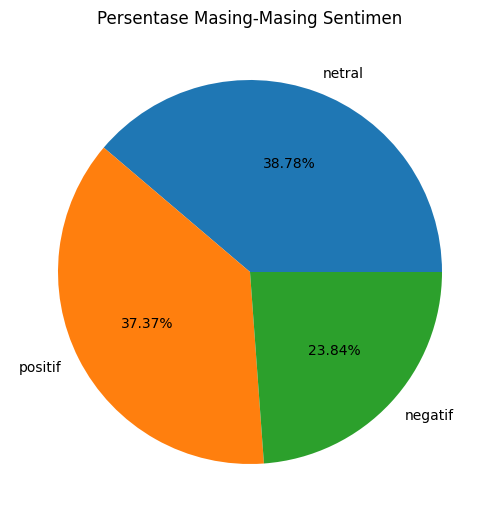

In [ ]:
diagram = data['sentimen'].value_counts().rename_axis('nilai_sentimen').reset_index(name='jumlah')
label = diagram.nilai_sentimen
nilai = diagram.jumlah

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')


ax.pie(nilai, labels = label, autopct='%1.2f%%' )
ax.set_title("Persentase Masing-Masing Sentimen")

In [ ]:
data.to_csv('label_textblob.csv', encoding='utf8', index=False)

**PEMODELAN**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, SimpleRNN
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load dataset
df = pd.read_csv("label_textblob.csv")
df = df.dropna(subset=['clean_text'])

# Define features and labels
X = df['clean_text']
y = df['sentimen']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Reshape the data (batch_size, timesteps, input_dim)
X_train_tfidf = X_train_tfidf.reshape((X_train_tfidf.shape[0], 1, X_train_tfidf.shape[1]))
X_test_tfidf = X_test_tfidf.reshape((X_test_tfidf.shape[0], 1, X_test_tfidf.shape[1]))

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, X_train_tfidf.shape[2])),
    SimpleRNN(256, activation='tanh', return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    SimpleRNN(128, activation='tanh'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(X_train_tfidf, y_train, epochs=100, validation_data=(X_test_tfidf, y_test), callbacks=[lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tfidf, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Predict the test set results
y_pred = model.predict(X_test_tfidf)
y_pred_classes = y_pred.argmax(axis=1)

# Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)


Epoch 1/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3426 - loss: 1.9162 - val_accuracy: 0.4467 - val_loss: 1.0654 - learning_rate: 1.0000e-04
Epoch 2/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4028 - loss: 1.5493 - val_accuracy: 0.5555 - val_loss: 0.9185 - learning_rate: 1.0000e-04
Epoch 3/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4307 - loss: 1.3975 - val_accuracy: 0.6012 - val_loss: 0.8558 - learning_rate: 1.0000e-04
Epoch 4/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4610 - loss: 1.2939 - val_accuracy: 0.6274 - val_loss: 0.8075 - learning_rate: 1.0000e-04
Epoch 5/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5009 - loss: 1.1731 - val_accuracy: 0.6564 - val_loss: 0.7723 - learning_rate: 1.0000e-04
Epoch 6/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5164 - loss: 1.1084 - val_accuracy: 0.6763 - val_loss: 0.7426 - learning_rate: 1.0000e-04
Epoch 7/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 256)         │       321,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,168,011 (4.46 MB)

 Trainable params: 388,995 (1.48 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 777,992 (2.97 MB)

In [4]:
from sklearn.metrics import classification_report
# Predict the test set results
y_pred = model.predict(X_test_tfidf)
y_pred_classes = y_pred.argmax(axis=1)

# Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, digits=4)
print(report)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

     negatif     0.7011    0.6837    0.6923       765
      netral     0.7713    0.8316    0.8003      1188
     positif     0.8098    0.7621    0.7852      1257

    accuracy                         0.7692      3210
   macro avg     0.7607    0.7591    0.7593      3210
weighted avg     0.7696    0.7692    0.7687      3210



In [5]:
# TEST
# inputan text 
sample_text = "polisi pasti banyak yang korupsi"
# Ensure the input is a numpy array with dtype 'object'
input_text = np.array([sample_text], dtype=object)

# Transform the sample text using the same TF-IDF vectorizer
input_text_tfidf = vectorizer.transform(input_text).toarray()
input_text_tfidf = input_text_tfidf.reshape((input_text_tfidf.shape[0], 1, input_text_tfidf.shape[1]))

# Predict using the model
prediction = model.predict(input_text_tfidf)
print(prediction)

if np.argmax(prediction) == 0:
    print("Neutral")
elif np.argmax(prediction) == 1:
    print("Positive")
else:
    print("Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.333982   0.02218649 0.6438316 ]]
Negative


**EDA**

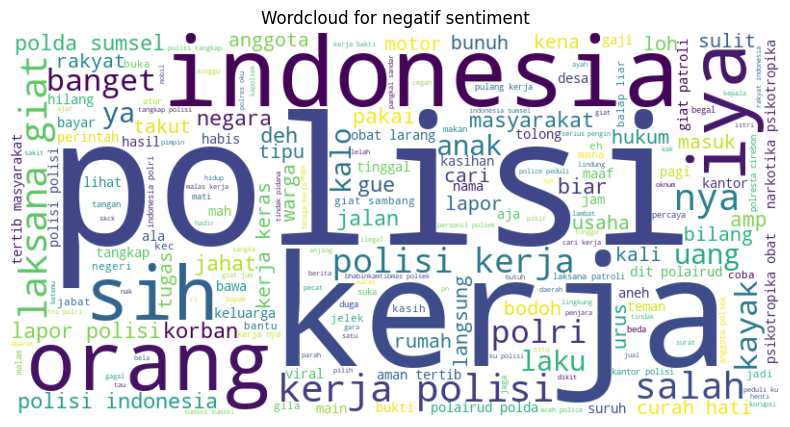

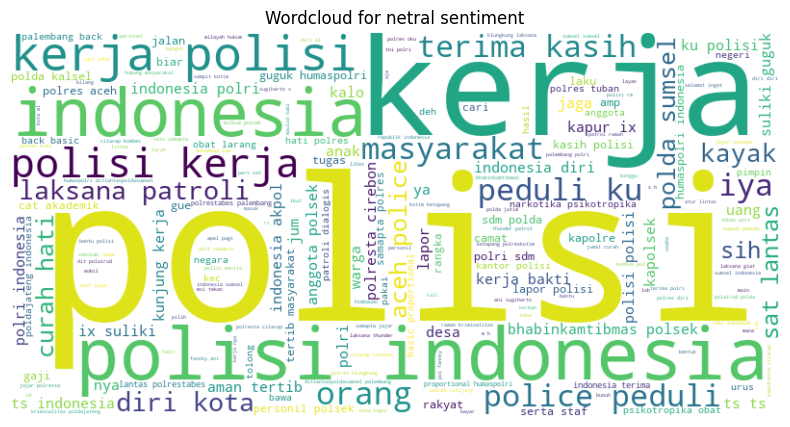

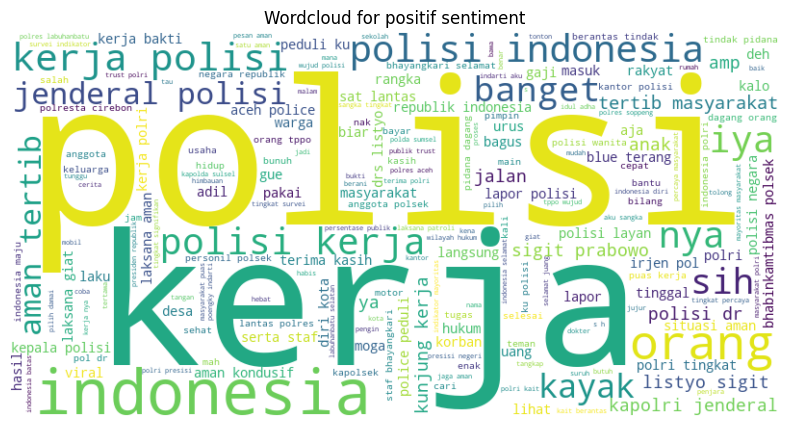

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("label_textblob.csv")
df = df.dropna(subset=['clean_text'])

# Define features and labels
X = df['clean_text']
y = df['sentimen']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create wordclouds for each sentiment class
sentiment_classes = label_encoder.classes_

for sentiment_class in sentiment_classes:
    # Select text for the current sentiment class
    class_text = X_train[y_train == label_encoder.transform([sentiment_class])[0]]
    text = " ".join(review for review in class_text)
    
    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the wordcloud
    plt.figure(figsize=(10, 5))
    plt.title(f'Wordcloud for {sentiment_class} sentiment')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


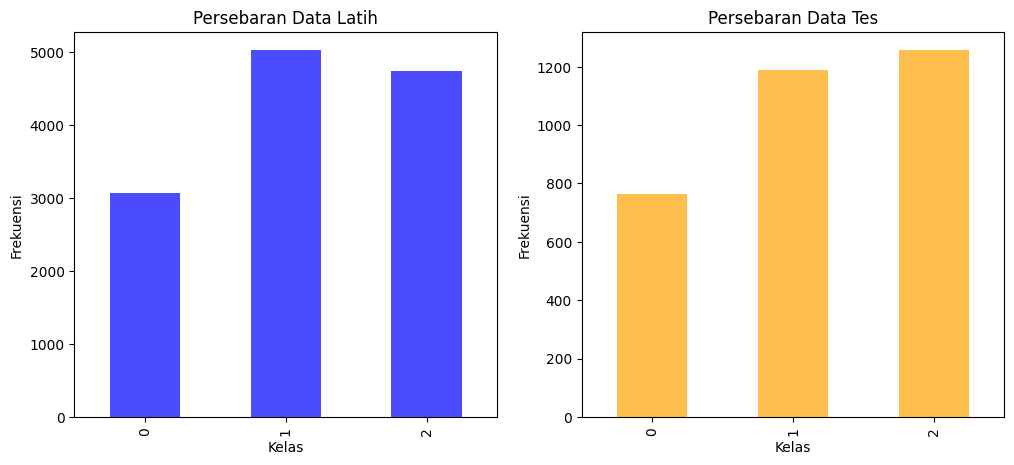

In [22]:
# Function to plot the distribution
def plot_distribution(y_train, y_test):
    train_dist = pd.Series(y_train).value_counts().sort_index()
    test_dist = pd.Series(y_test).value_counts().sort_index()

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    train_dist.plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
    test_dist.plot(kind='bar', ax=ax[1], color='orange', alpha=0.7)

    ax[0].set_title('Persebaran Data Latih')
    ax[0].set_xlabel('Kelas')
    ax[0].set_ylabel('Frekuensi')

    ax[1].set_title('Persebaran Data Tes')
    ax[1].set_xlabel('Kelas')
    ax[1].set_ylabel('Frekuensi')

    plt.show()

# Plot the distribution
plot_distribution(y_train, y_test)


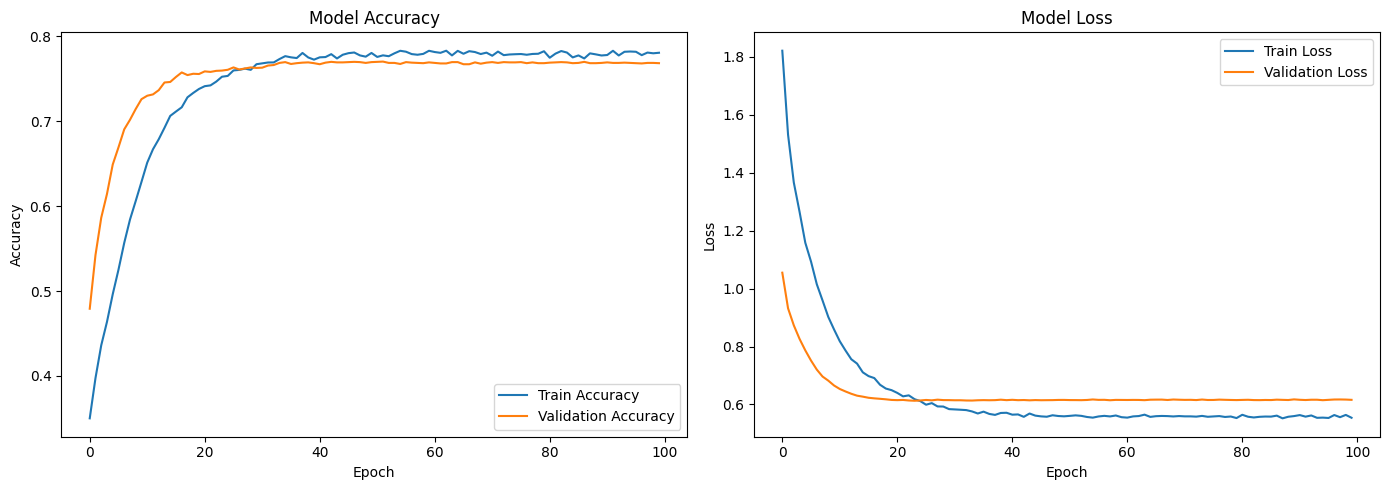

In [18]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plot training and validation accuracy and loss from the model's history object.
    
    Args:
    history (tf.keras.callbacks.History): The history object returned from model.fit().
    """
    plt.figure(figsize=(14, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


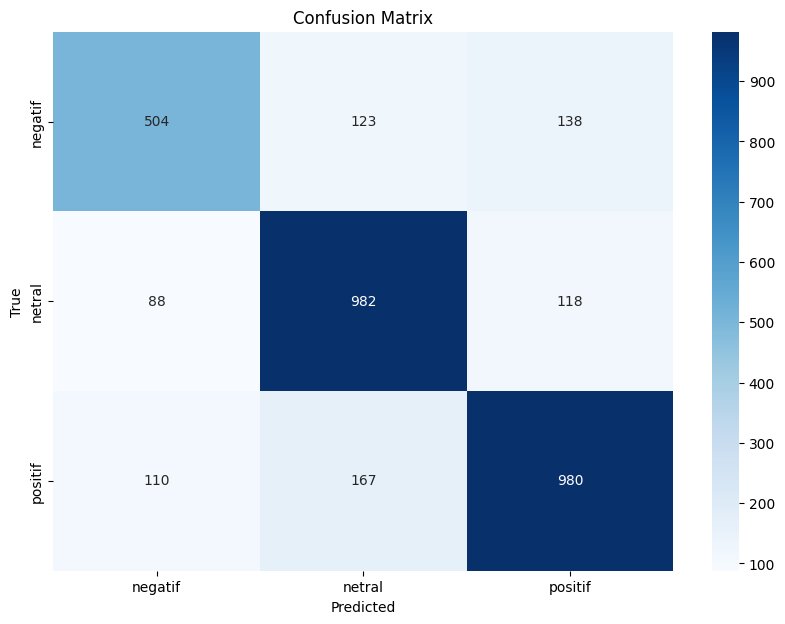

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plot the confusion matrix using seaborn heatmap.
    
    Args:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    labels (list): List of class labels.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Assume `y_test` and `y_pred_classes` are available from your model evaluation
plot_confusion_matrix(y_test, y_pred_classes, label_encoder.classes_)


In [ ]:
from sklearn.metrics import classification_report
# Make predictions
y_pred = model.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

     negatif       0.65      0.57      0.61       765
      netral       0.70      0.77      0.73      1188
     positif       0.72      0.71      0.72      1257

    accuracy                           0.70      3210
   macro avg       0.69      0.68      0.69      3210
weighted avg       0.70      0.70      0.70      3210



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Load dataset
df = pd.read_csv("label_textblob.csv")

# Menghapus baris dengan nilai NaN pada kolom clean_text
df = df.dropna(subset=['clean_text'])

# Define features and labels
X = df['clean_text']
y = df['sentimen']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert the TF-IDF matrices to dense format (needed for input to Keras model)
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Define the model with SimpleRNN
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_tfidf_dense.shape[1], 1)),
    tf.keras.layers.SimpleRNN(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# Reshape the data to match the input shape of the RNN
X_train_tfidf_reshaped = X_train_tfidf_dense.reshape((X_train_tfidf_dense.shape[0], X_train_tfidf_dense.shape[1], 1))
X_test_tfidf_reshaped = X_test_tfidf_dense.reshape((X_test_tfidf_dense.shape[0], X_test_tfidf_dense.shape[1], 1))

# Train the model
history = model.fit(X_train_tfidf_reshaped, y_train, epochs=10, validation_data=(X_test_tfidf_reshaped, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tfidf_reshaped, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 1187s 3s/step - accuracy: 0.3771 - loss: 1.0909 - val_accuracy: 0.3723 - val_loss: 1.0825
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 1128s 3s/step - accuracy: 0.3734 - loss: 1.0806 - val_accuracy: 0.3704 - val_loss: 1.0790
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 1097s 3s/step - accuracy: 0.3832 - loss: 1.0794 - val_accuracy: 0.3701 - val_loss: 1.0814
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 1045s 3s/step - accuracy: 0.3880 - loss: 1.0769 - val_accuracy: 0.3710 - val_loss: 1.0771
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 1090s 3s/step - accuracy: 0.3848 - loss: 1.0778 - val_accuracy: 0.3916 - val_loss: 1.0773
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 1102s 3s/step - accuracy: 0.3859 - loss: 1.0769 - val_accuracy: 0.3707 - val_loss: 1.0776
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 1096s 3s/step - accuracy: 0.3976 - loss: 1.0714 - val_accuracy: 0.3713 - val_loss: 1.0779
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 1095s 3s/step - accuracy: 0.3902 - loss: 1.0793 - 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
df = pd.read_csv("label_textblob.csv")

# Menghapus baris dengan nilai NaN pada kolom clean_text
df = df.dropna(subset=['clean_text'])

# Define features and labels
X = df['clean_text']
y = df['sentimen']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Menentukan panjang maksimum dari urutan
max_len = max(len(seq) for seq in X_train_seq)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=max_len),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=100, validation_data=(X_test_pad, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/100


c:\Users\ASUS K413\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


402/402 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5046 - loss: 0.9929 - val_accuracy: 0.6022 - val_loss: 0.8506
Epoch 2/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.6660 - loss: 0.7379 - val_accuracy: 0.6991 - val_loss: 0.7181
Epoch 3/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8204 - loss: 0.4866 - val_accuracy: 0.7299 - val_loss: 0.6613
Epoch 4/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9156 - loss: 0.2706 - val_accuracy: 0.7374 - val_loss: 0.7381
Epoch 5/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9440 - loss: 0.1752 - val_accuracy: 0.7072 - val_loss: 0.9211
Epoch 6/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.9592 - loss: 0.1276 - val_accuracy: 0.7206 - val_loss: 0.8887
Epoch 7/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9739 - loss: 0.0835 - val_accuracy: 0.7237 - val_loss: 0.9640
Epoch 8/100
402/402 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.9828 - loss: 0.0587 - val_